# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Инструкция по выполнению проекта

- Шаг 1. Откройте файл с данными и изучите общую информацию

- Шаг 2. Предобработка данных
определите и изучите пропущенные значения:
для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать;
заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения;
укажите причины, которые могли привести к пропускам в данных.
приведите данные к нужным типам:
поясните, в каких столбцах нужно изменить тип данных и почему.

- Шаг 3. Посчитайте и добавьте в таблицу:
цену квадратного метра;
день недели, месяц и год публикации объявления;
этаж квартиры; варианты — первый, последний, другой;
соотношение жилой и общей площади, а также отношение площади кухни к общей.

- Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:
Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

- Шаг 5. Напишите общий вывод

# Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

- Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.shape

(23699, 22)

- <font color=green>Получено 22 атрибута.</font>

- <font color=green>Давайте посмотрим на первые 10 строк таблицы данных. </font>

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


- <font color=green>Общая информация о данных в таблице.</font>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

- В таблице содержится 23 699 записей, 22 столбца.
- В таблице есть разные типы данных.

### Шаг 2. Предобработка данных

<font color=green>Посмотрим наличие и количество дубликатов в таблице.</font>

In [6]:
data.duplicated().sum()

0

### Определение и заполнение пропущенных значений

<font color=green>Наличие и количество отсутствующих данных в таблице.</font>

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<font color=green>Давайте посмотрим все отсутствующие данные, которые были обнаружены в предыдущей ячейке в порядке наличия отсутствующих данных.</font> 

- ceiling_height 9195
- floors_total 86
- living_area 1903
- is_apartment 20924
- kitchen_area 2278
- balcony 11519
- locality_name 49
- airports_nearest 5542
- cityCenters_nearest 5519
- parks_around3000 5518
- parks_nearest 15620
- ponds_around3000 5518
- ponds_nearest 14589
- days_exposition 3181

- ceiling_height - 9195 пропущенных значений.
В среднем высота потолков в квартирах в России колеблется от 2,4 до 3,2 м. Минимальная высота потолка определяется строительными нормами 2,4 м. Высота потолков в квартирах зависит от застройщика и не зависит от количества этажей дома или от площади самой квартиры.

In [8]:
chm = data['ceiling_height'].max()
ceiling_min = data['ceiling_height'].min()
ceiling_mean = data['ceiling_height'].mean()
ceiling_median = data['ceiling_height'].median()

print("Максимальное значение в столбце высоты потолка: {:.2f}(м)".format(chm))
print("Максимальное значение в столбце высоты потолка: {:.2f}(м)".format(ceiling_min))
print("Средняя высота столбца потолка: {:.2f}(м)".format(ceiling_mean))
print("Средняя высота потолка колонны: {:.2f}(м)".format(ceiling_median))

Максимальное значение в столбце высоты потолка: 100.00(м)
Максимальное значение в столбце высоты потолка: 1.00(м)
Средняя высота столбца потолка: 2.77(м)
Средняя высота потолка колонны: 2.65(м)


<font color = green>  Сначала я посмотрел на максимальное, минимальное, медианное и среднее значения, а затем вспомнил о методе description ().</font>

In [9]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

- <font color = green> Средний потолок составляет 2,77 метра. Это довольно высокий потолок. </font>
- <font color = green> Также в столбце есть пробелы в количестве 9195 значений. Я имею в виду пробелы в медианном значении столбца.</font>
- <font color = green> Необходимо убедиться, что пробелы заполнены: </font>

In [10]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
print (data['ceiling_height'].isna().sum())

0


2. floor_total - 86 пропущенных значений.
Количество этажей в доме также зависит от плана застройки. В столбце 86 значений отсутствуют, поскольку мы не знаем план зданий и застройщиков, мы предполагаем, что это одноэтажные дома. Заполните пропуски значением 1. Даже если наше предположение неверно, 86 записей не должны сильно смешать данные.

In [11]:
data['floors_total'] = data['floors_total'].fillna(1)
print (data['floors_total'].isna().sum())

0


3. living_area - 1903 пропущенных значения.
Заполним пропущенные значения медианым значением.

In [12]:
data.loc[data['living_area'].isnull(), 'living_area'] = data['living_area'].median()
print (data['living_area'].isna().sum())

0


4. is_apartment - 20924 пропущенных значений.
Логический тип - требуется в столбце квартиры. Значения данных либо Истинные - квартира это квартиры, а Ложные - квартира не апартаменты. Заполните пробелы значением «False» и убедитесь, что они заполнены:

In [13]:
print (f"Количество отсутствующих данных в столбце is_apartment: {data['is_apartment'].isna().sum()}")

Количество отсутствующих данных в столбце is_apartment: 20924


In [14]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print (f"Проверим отсутствующие данные: \n{data['is_apartment'].value_counts()}")

Проверим отсутствующие данные: 
False    23649
True        50
Name: is_apartment, dtype: int64


In [15]:
print (data['is_apartment'].isna().sum())

0


5. kitchen_area - 2278 пропущенных значений.
Заполнить пропущенные значения медианным значением.

In [16]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
print (data['kitchen_area'].isna().sum())

0


6. balcony – 11519 пропущенных значений.
Количество балконов в квартире также зависит от плана застройки. В столбце пропущено 11 519 значений, поэтому мы не знаем, что это за одноэтажные дома. Заполнить пробелы по умолчанию 0,0 и убедится, что они заполнены:

In [17]:
data['balcony'] = data['balcony'].fillna(0.0)

In [18]:
print (f"Количество данных в колонке balcony: \n{data['balcony'].value_counts()}")

Количество данных в колонке balcony: 
0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64


In [19]:
print (f"Проверка отсутствующих данных: {data['balcony'].isna().sum()}")

Проверка отсутствующих данных: 0


7. locality_name – 49 пропущенных значений.
В столбце название населенного пункта - 49 пропущенных значений. Это небольшое количество пропущенных значений.

In [20]:
len(data['locality_name'])

23699

In [21]:
print (f"Проверка отсутствующие данные: {data['locality_name'].isna().sum()}")

Проверка отсутствующие данные: 49


In [22]:
data['locality_name'] = data['locality_name'].fillna('undefined')

<font color = green> Поскольку название области не коррелирует с другими функциями.
Я заполняю 49 значений - информацией для этих значений как не определена (не определена).</font>

In [23]:
data['locality_name'] = data['locality_name'].fillna('undefined')
print (f"Проверка отсутствующие данные: {data['locality_name'].isna().sum()}")

Проверка отсутствующие данные: 0


8. airport_nearest - 5542 пропущенных значения.
9. cityCenters_nearest - 5519 пропущенных значений.

В столбцах расстояние до аэропортов составляет 5 542 пропущенных значения, в столбце расстояние до центра города составляет 5 519 пропущенных значений. Заполню данные медианным значением.

In [24]:
median_data = data.pivot_table(
    index='locality_name',
    values=['airports_nearest', 'cityCenters_nearest'],
    aggfunc='median'
)

median_data

,airports_nearest,cityCenters_nearest
locality_name,,
undefined,22041.0,8943.0
Зеленогорск,72282.0,53381.0
Колпино,26232.0,32018.0
Красное Село,25715.5,29140.5
Кронштадт,67850.0,49575.0
Ломоносов,48415.5,51677.0
Павловск,20529.5,32683.0
Петергоф,39231.0,33771.0
Пушкин,15766.0,27930.5


In [25]:
median_data_localities = list(median_data.index)

In [26]:
def fill_missing_data(row, col):
    locality = row['locality_name']
    
    if locality in median_data_localities:
        return median_data.loc[locality][col]
    
    return row[col]

In [27]:
columns = ['airports_nearest', 'cityCenters_nearest']

for column in columns:
    data.loc[data[column].isnull(), column] = data.apply(fill_missing_data, axis=1, args=(column,))

In [28]:
data['airports_nearest'] = data['airports_nearest'].fillna(-999.99)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-999.99)

<font color = green> Проверить данные о том, сколько населенных пунктов не может быть заполнено. </ font>

In [29]:
len(data[data['cityCenters_nearest'].isnull()]['locality_name'].unique())

0

Проверю соотношение параметров: количество парков в радиусе 3 км, расстояние до ближайшего парка (м), количество резервуаров в радиусе 3 км, расстояние до ближайшего резервуара (м).

In [30]:
print ("\nИщем связь между количеством парков в радиусе 3 км и другими параметрами:")
print (data.corr()['parks_around3000'].reset_index(name='correlation'))

#print (data.corr()['parks_nearest'].reset_index(name='correlation'))
#print (data.corr()['ponds_around3000'].reset_index(name='correlation'))
#print (data.corr()['ponds_nearest'].reset_index(name='correlation'))


Ищем связь между количеством парков в радиусе 3 км и другими параметрами:
                  index  correlation
0          total_images     0.021120
1            last_price     0.151058
2            total_area     0.164689
3                 rooms     0.137257
4        ceiling_height     0.056665
5          floors_total    -0.251019
6           living_area     0.176729
7                 floor    -0.163784
8          is_apartment     0.020767
9                studio    -0.030202
10            open_plan    -0.010077
11         kitchen_area     0.082927
12              balcony    -0.077777
13     airports_nearest     0.000577
14  cityCenters_nearest    -0.161683
15     parks_around3000     1.000000
16        parks_nearest    -0.259514
17     ponds_around3000     0.304316
18        ponds_nearest    -0.167103
19      days_exposition     0.060491


Поскольку корреляция с другими параметрами для всех 4 параметров является низкой. Можно сказать, что значения этих столбцов не зависят от других величин. Мы добавляем информацию, что для них значение не определено, так как это не повлияет на анализ.

In [31]:
data['parks_around3000'] = data['parks_around3000'].fillna(-999.99)
data['parks_nearest'] = data['parks_nearest'].fillna(-999.99)
data['ponds_nearest'] = data['ponds_nearest'].fillna(-999.99)

print (f"Проверка отсутствующих данных: {data['parks_around3000'].isna().sum()}")
print (f"Проверка отсутствующих данных: {data['parks_nearest'].isna().sum()}")
print (f"Проверка отсутствующих данных: {data['ponds_nearest'].isna().sum()}")

Проверка отсутствующих данных: 0
Проверка отсутствующих данных: 0
Проверка отсутствующих данных: 0


14. days_exposition - 3181 пропущенных значений.
Количество дней, в течение которых было объявлено о продаже квартиры. Для каждого искаженного знания мы вычисляем медианное значение и заполняем пробелы медианным значением.

Перед заполнением пробелов в столбце days_exposition необходимо перевести столбец first_day_exposition к типу данных% Y-% m-% d, т.к. Столбец days_exposition зависит от второго.

In [32]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [33]:
data.loc[data['days_exposition'].isnull(), 'days_exposition'] = data['days_exposition'].median()
print (f"Check for missing data: {data['days_exposition'].isna().sum()}")

Check for missing data: 0


### Изменения типа данных

Имя столбцов отображается в списке. Правильные типы данных отмечены зеленым, неправильные значения типов данных - красным.

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м); <font color=green>float64</font>
- balcony — число балконов; <font color=red>float64</font>
- ceiling_height — высота потолков (м); <font color=green>float64</font>
- cityCenters_nearest — расстояние до центра города (м); <font color=red>float64</font>
- days_exposition — сколько дней было размещено объявление (от публикации до снятия); <font color=red>object</font>
- first_day_exposition — дата публикации
- floor — этаж; <font color=green>int64</font>
- floors_total — всего этажей в доме; <font color=red>float64</font>
- is_apartment — апартаменты (булев тип); <font color=red>object</font>
- kitchen_area — площадь кухни в квадратных метрах (м²); <font color=red>int64</font>
- last_price — цена на момент снятия с публикации; <font color=green>float64</font>
- living_area — жилая площадь в квадратных метрах(м²); <font color=green>float64</font>
- locality_name — название населённого пункта; <font color=green>object</font>
- open_plan — свободная планировка (булев тип); <font color=green>bool</font>
- parks_around3000 — число парков в радиусе 3 км; <font color=green>float64</font>
- parks_nearest — расстояние до ближайшего парка (м); <font color=green>float64</font>
- ponds_around3000 — число водоёмов в радиусе 3 км; <font color=green>float64</font>
- ponds_nearest — расстояние до ближайшего водоёма (м); <font color=green>float64</font>
- rooms — число комнат; <font color=green>int64</font>
- studio — квартира-студия (булев тип); <font color=green>bool</font>
- total_area — площадь квартиры в квадратных метрах (м²); <font color=green>float64</font>
- total_images — число фотографий квартиры в объявлении; <font color=green>int64</font>

Для следующих характеристик вы должны преобразовать типы:

1. balcony – тип float64 конвертировать в int64
2. days_exposition – тип float64 конвертировать в int64
3. floors_total – тип float64 преобразовать в int64

In [34]:
for column in ['balcony', 'floors_total', 'days_exposition']:
    data[column] = data[column].astype('int')

4. first_day_exposition - тип объекта переводится в% Y-% m-% dм

In [35]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

5. is_apartment - тип объекта переводит в bool.
Поскольку я заполнил данные столбца False и True, я думаю, что этого будет достаточно, и не стоит переводить их в тип данных bool.

6. kitchen_area - введите int64 для перевода в float64

In [36]:
data['kitchen_area'] = data['kitchen_area'].astype('float')

<font color = green> Проверим наличие изменений типа данных.</font>

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_aroun

### Вывод

- В наборе данных нет дубликатов;
- В наборе данных много пропущенных данных. В таких столбцах, как: потолок_высота (9195), этажей_салона (86), жилой_район (1903 г.), квартал is_apartment (20924), район кухни (2278), балкон (11519), имя населенного пункта (49), ближайшие_ аэропорты (5542), cityCenters_nearest (5519), parks_around3000 (5518), parks_nearest (15620), ponds_around3000 (5518), ponds_nearest (14589), дни_экспозиция (3181);

- В столбце, описывающем высоту потолков в квартирах на продажу (floor_heigh) - 9195 пропущенных значений, заполнены пропуски с медианным значением для столбца. В среднем высота потолков в квартирах по данным таблицы, предложенным для анализа = 2,77 (м). Интересно, что максимальное значение в столбце - это высота потолков: 100,00 (м), это высота потолков.

- В столбце, описывающем количество этажей в доме (floors_total) - 86 пропущенных значений, заполнены пробелы значением 1. Даже если наше предположение неверно, 86 записей не должны сильно смещать распределение.

- В столбце с описанием жилой площади в квадратных метрах (м²) (living_area) - 1903 пропущенные значения заполняются пропущенными значениями с медианным значением.

- В столбце описания квартиры как квартиры (is_apartment) - 20924 пропущенных значения. Значения пропавших были заменены на Ложные - квартира не квартира. Я не изменил тип данных в столбце, поскольку считаю, что значения True и False более четко отражают отношение свойства к типу квартиры.

- В столбце, описывающем площадь кухни в квадратных метрах (м²) (kitchen_area) - 2278 пропущенных значений, заполняются пропущенные значения медианным значением.

- В столбце, описывающем наличие балкона (балкон) - 11519 пропущенных значений, заполняется 0,0 значениями. Она предположила, что это одноэтажные дома, так как не знала ни плана застройки, ни застройщика.

- В столбце название населенного пункта (locality_name) - 49 пропущенных значений, заполнены значения тем, что информация для этих значений не является неопределенной (undefined). Так как название местности не соотносится с другими знаками.

- В столбцах расстояние до аэропортов (airport_nearest) - 5 542 пропущенных значений, а в столбце - расстояние до центра города (cityCenters_nearest) 5 519 пропущенных значений. Мы заполняем данные медианным значением, для 336 строк не удалось заполнить значения. В этих случаях, скорее всего, пробелы появляются в населенных пунктах, которые не являются городами или находятся достаточно далеко от городов. Или нет данных для расчета расстояний.

- В столбцах количество парков в радиусе 3 км (parks_around3000), расстояние до ближайшего парка (м) (parks_nearest), количество резервуаров в радиусе 3 км (ponds_around3000), расстояние до ближайшего резервуар (м) (ponds_nearest): количество пропущенных значений составляет 5518, 15620, 5518, 14589. Проверил корреляцию с другими параметрами, оказалось незначительным с 0,0005 до 0,3. Поскольку корреляция с другими параметрами для всех 4 параметров является низкой. Можно сказать, что значения этих столбцов не зависят от других величин. Она добавила информацию, что для пропущенных значений в этих столбцах значение не определено, так как это не повлияет на анализ.

- В столбце с описанием количества дней размещения объявления о продаже квартиры было размещено (days_exposition) - 3181 пропущенных значений. Для каждого пропущенного значения вычислялось значение медианы и значение медианы, заполненные пробелами. Перед заполнением пробелов в столбце days_exposition преобразуйте столбец first_day_exposition в тип данных% Y-% m-% d, поскольку столбец days_exposition зависит от даты публикации объявлений.

### Шаг 3. Посчитайте и добавьте в таблицу:

#### Посчитай и добавь в таблицу: цена за квадратный метр
Чтобы узнать стоимость одного квадратного метра, необходимо разделить стоимость квартиры (столбец last_price) на общую площадь квартиры (столбец total_area).

In [38]:
data['meter_price'] = data['last_price'] / data['total_area']
data['meter_price'] = data['meter_price'].astype('int')
print (f"Средняя стоимость квадратного метра для всех квартир:\"{data['last_price'].sum() / data['total_area'].sum()}\"")

Средняя стоимость квадратного метра для всех квартир:"108395.94031315896"


In [39]:
data[:5][['total_area', 'last_price', 'meter_price']]

,total_area,last_price,meter_price
0,108.0,13000000.0,120370
1,40.4,3350000.0,82920
2,56.0,5196000.0,92785
3,159.0,64900000.0,408176
4,100.0,10000000.0,100000


#### Рассчитайте и добавьте в таблицу: день недели, месяц и год публикации объявления

In [40]:
data['day_week'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [41]:
data[:5][['first_day_exposition', 'day_week', 'month', 'year']]

,first_day_exposition,day_week,month,year
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018


#### Посчитай и добавь к столу: этаж квартиры; варианты - первый, последний, другой

In [42]:
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data_floor_category = data.apply(categorize_floor, axis=1)

In [43]:
data_floor_category.value_counts()

другой       17446
последний     3336
первый        2917
dtype: int64

#### Рассчитайте и добавьте в таблицу: отношение жилой и общей площади, а также отношение площади кухни к общей.

In [44]:
data['living_ratio'] = (data['living_area'] / data['total_area']) * 100
data['kitchen_ratio'] = (data['kitchen_area'] / data['total_area']) * 100
data['living_ratio'] = data['living_ratio'].astype(str) + '%'
data['kitchen_ratio'] = data['kitchen_ratio'].astype(str) + '%'

data_liv = (data['living_area'].sum() / data['total_area'].sum()) * 100
data_kit = (data['kitchen_area'].sum() / data['total_area'].sum()) * 100

print("Соотношение жилой и общей площади: {:.2f}".format(data_liv))
print("Соотношение площади кухни к общему: {:.2f}".format(data_kit))

Соотношение жилой и общей площади: 56.50
Соотношение площади кухни к общему: 17.28


In [45]:
data[:5][['total_area', 'living_area', 'living_ratio', 'kitchen_area', 'kitchen_ratio']]

,total_area,living_area,living_ratio,kitchen_area,kitchen_ratio
0,108.0,51.0,47.22222222222222%,25.0,23.14814814814815%
1,40.4,18.6,46.03960396039605%,11.0,27.22772277227723%
2,56.0,34.3,61.24999999999999%,8.3,14.821428571428571%
3,159.0,30.0,18.867924528301888%,9.1,5.723270440251572%
4,100.0,32.0,32.0%,41.0,41.0%


#### Изучить параметры: площадь, цена, количество комнат, высота потолков

In [46]:
data[:5][['total_area', 'rooms', 'ceiling_height', 'last_price']]

,total_area,rooms,ceiling_height,last_price
0,108.0,3,2.70,13000000.0
1,40.4,1,2.65,3350000.0
2,56.0,2,2.65,5196000.0
3,159.0,3,2.65,64900000.0
4,100.0,2,3.03,10000000.0


#### Постройте гистограммы для каждого параметра: площадь, цена, количество комнат, высота потолка
Построены гистограммы зависимостей каждого из параметров от количества проданных квартир.

AxesSubplot(0.125,0.125;0.775x0.755)


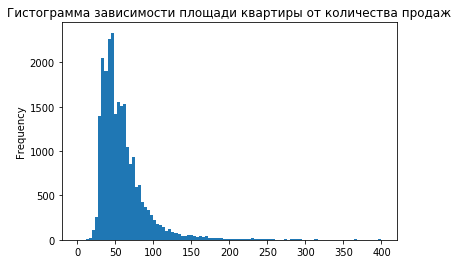

AxesSubplot(0.125,0.125;0.775x0.755)


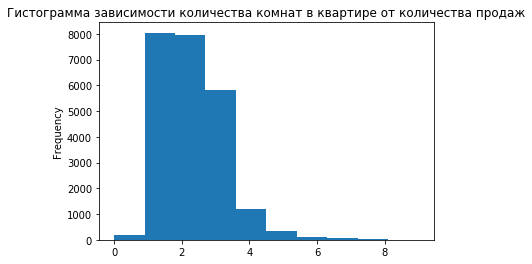

AxesSubplot(0.125,0.125;0.775x0.755)


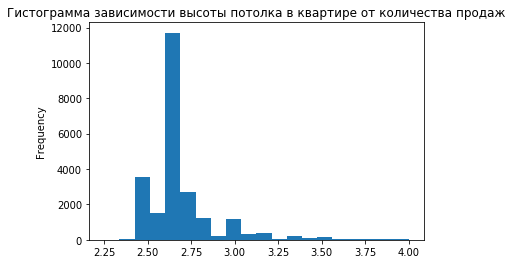

AxesSubplot(0.125,0.125;0.775x0.755)


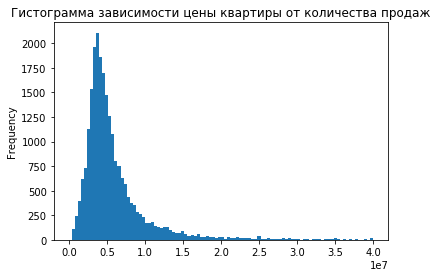

In [47]:
def hist_plots(data, columns, bins, ranges, ylims, titles):
    for i in range(0, len(columns)):
        print (data[columns[i]].plot(
            kind='hist', 
            bins=bins[i], 
            range=ranges[i],
            ylim=ylims[i],
            title=titles[i]
        ))
        plt.show()
    return

hist_plots(data, 
    ['total_area', 'rooms', 'ceiling_height', 'last_price'],
    [100, 10, 20, 100],
    [(0, 400), (0, 9), (2.25, 4), (0, 40000000)],
    [None, None, None, None],
    [
        "Гистограмма зависимости площади квартиры от количества продаж",
        "Гистограмма зависимости количества комнат в квартире от количества продаж",
        "Гистограмма зависимости высоты потолка в квартире от количества продаж",
        "Гистограмма зависимости цены квартиры от количества продаж"
    ]
)

### Вывод

- Цена за квадратный метр для всех квартир, представленных в таблице данных, составила 108 395 рублей.
- Чаще всего есть предложения по продаже квартир не на первом и последнем этажах. Количество таких квартир в общей выборке по данным составило 17 446 квартир.
- Соотношение жилых представленных квартир к общей площади квартир: 56,50%
- Соотношение площади кухни представленных квартир к общему количеству квартир: 17,28%
- Наиболее популярными являются квартиры общей площадью от 40 кв. М до 60 кв. М.
- Также наиболее популярными являются однокомнатные и двухкомнатные квартиры.
- Чаще всего высота потолков востребованных на рынке квартир составляет 2,6 м.
- Стоимость самых популярных квартир на рынке составляет 5 000 000 рублей.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Изучите время продажи квартиры.

- Постройте гистограмму.
- Рассчитайте среднее значение и медиану.
- Опишите, сколько обычно занимает продажа.
- Когда можно предположить, что продажи были очень быстрыми, а когда - необычно долгим?

In [48]:
data['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [49]:
days_mean = data['days_exposition'].mean()
days_median = data['days_exposition'].median()

print("Среднее значение по столбцу 'apartment sale time': {:.2f}(дней)".format(days_mean))
print("Медиана в слобце 'apartment sale time': {:.2f}(дней)".format(days_median))

Среднее значение по столбцу 'apartment sale time': 169.36(дней)
Медиана в слобце 'apartment sale time': 95.00(дней)


<font color = green> Давайте построим гистограмму времени продажи квартиры по количеству проданных квартир.</font>

AxesSubplot(0.125,0.125;0.775x0.755)


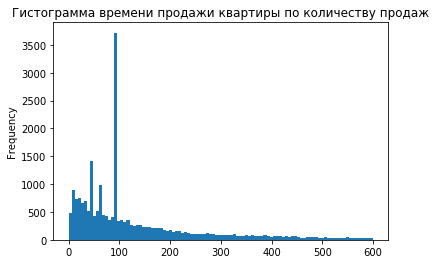

In [50]:
def hist_plots_time(data, columns, bins, ranges, ylims, titles):
    for i in range(0, len(columns)):
        print (data[columns[i]].plot(
            kind='hist', 
            bins=bins[i], 
            range=ranges[i],
            ylim=ylims[i],
            title=titles[i]
        ))
        plt.show()
    return

hist_plots_time(
    data, 
    ['days_exposition'],
    [100],
    [(0, 600)],
    [None],
    [
        'Гистограмма времени продажи квартиры по количеству продаж',
    ]
)

Удалены значения выбивки из диаграммы выше:

AxesSubplot(0.125,0.125;0.775x0.755)


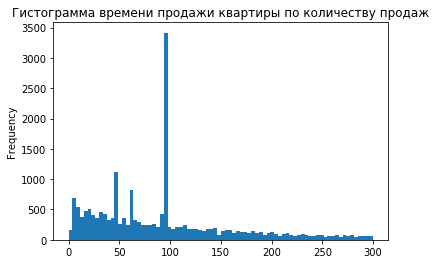

In [51]:
def hist_plots_time(data, columns, bins, ranges, ylims, titles): 
    for i in range(0, len(columns)):
        print (data[columns[i]].plot(
            kind='hist', 
            bins=bins[i], 
            range=ranges[i],
            ylim=ylims[i],
            title=titles[i]
        ))
        plt.show()
    return

hist_plots_time(
    data, 
    ['days_exposition'],
    [80],
    [(0, 300)],
    [None],
    [
        'Гистограмма времени продажи квартиры по количеству продаж',
    ]
)

#### Вывод:
Среднее время продажи квартиры: 95 дней
Квартира продается сразу или в течение 3 месяцев (95 дней). Гистограмма показывает, что через 90-100 дней наблюдается снижение количества проданных квартир.

#### Удалить редкие и устаревшие значения.
Мы изучаем факторы, влияющие на стоимость недвижимости.

<font color = green> Факторы будут рассматриваться в контексте данных, которые были очищены на предыдущих этапах. Для ломтиков у нас будут следующие условия:</font>

In [52]:
total_area_query = 'total_area >= 12 and total_area <= 115'
last_price_query = 'last_price >= 4.3e+5 and last_price <= 1.2e+7'
rooms_query = 'rooms >= 1 and rooms <= 6'
ceiling_height_query = 'ceiling_height >= 2.4 and ceiling_height <= 3.2'
days_exposition_query = 'days_exposition >= 7 and days_exposition <= 430'

<font color = green> Зависимость стоимости недвижимости от цены за квадратный метр.</font>

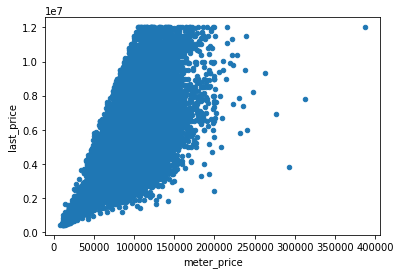

In [53]:
clean_data_query = f'{total_area_query} and {last_price_query}'
clean_data = data.query(clean_data_query)

clean_data.plot(x='meter_price', y='last_price', kind='scatter')
plt.show()

In [54]:
cor_clean_meter = clean_data['meter_price'].corr(clean_data['last_price'])
print("Соотношение стоимости имущества с ценой за квадратный метр: {:.2f}".format(cor_clean_meter))

Соотношение стоимости имущества с ценой за квадратный метр: 0.63


<font color = green> Зависимость стоимости недвижимости от количества комнат.</font>

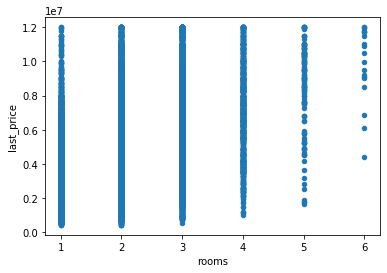

In [55]:
clean_data_query = f'{rooms_query} and {last_price_query}'
clean_data = data.query(clean_data_query)

clean_data.plot(x='rooms', y='last_price', kind='scatter')
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


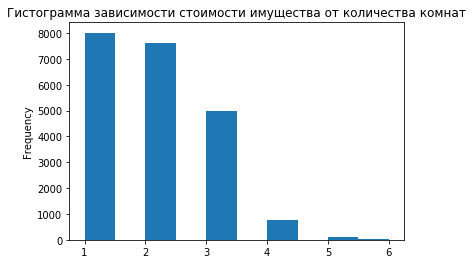

In [56]:
def hist_plots_room(data, columns, bins, ranges, ylims, titles):
    for i in range(0, len(columns)):
        print (data[columns[i]].plot(
            kind='hist', 
            bins=bins[i], 
            range=ranges[i],
            ylim=ylims[i],
            title=titles[i]
        ))
        plt.show()
    return

hist_plots_room(
    clean_data, 
    ['rooms'],
    [10],
    [(1, 6)],
    [None],
    [
        'Гистограмма зависимости стоимости имущества от количества комнат',
    ]
)

In [57]:
cor_clean_rooms = clean_data['rooms'].corr(clean_data['last_price'])
print("Соотношение стоимости недвижимости с количеством комнат: {:.2f}".format(cor_clean_rooms))

Соотношение стоимости недвижимости с количеством комнат: 0.45


<font color = green> Зависимость стоимости недвижимости от пола.</font>

In [58]:
data[['floor', 'last_price']].query(last_price_query).pivot_table(index='floor', values='last_price')

,last_price
floor,
1,4.160474e+06
2,4.727048e+06
3,4.894708e+06
4,4.873951e+06
5,4.622358e+06
6,5.264891e+06
7,5.116754e+06
8,5.094503e+06
9,5.076549e+06


In [59]:
cor_clea_floor = clean_data['floor'].corr(clean_data['last_price'])
print("Соотношение стоимости имущества от этажа: {:.2f}".format(cor_clea_floor))

Соотношение стоимости имущества от этажа: 0.13


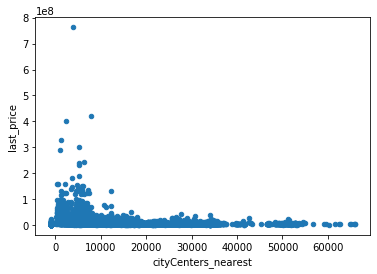

In [60]:
clean_data = data.query(last_price_query)
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter')
plt.show()

In [61]:
cor_clean_cityCenters = clean_data['cityCenters_nearest'].corr(clean_data['last_price'])
print("Соотношение стоимости недвижимости с количеством комнат: {:.2f}".format(cor_clean_cityCenters))

Соотношение стоимости недвижимости с количеством комнат: 0.11


<font color = green> Зависимость стоимости недвижимости от даты публикации объявления.</font>

In [62]:
clean_data = data.query(f'{days_exposition_query} and {last_price_query}')

In [63]:
clean_data[['day_week', 'month', 'year', 'last_price']].corr()

,day_week,month,year,last_price
day_week,1.000000,0.010180,-0.013679,-0.012430
month,0.010180,1.000000,-0.305183,0.004125
year,-0.013679,-0.305183,1.000000,0.028693
last_price,-0.012430,0.004125,0.028693,1.000000


<font color = green> Составьте гистограммы зависимостей каждого из параметров от количества проданных квартир.</font>
<font color = green> Такие гистограммы уже созданы, но теперь мы будем строить гистограммы после очистки.</font>

AxesSubplot(0.125,0.125;0.775x0.755)


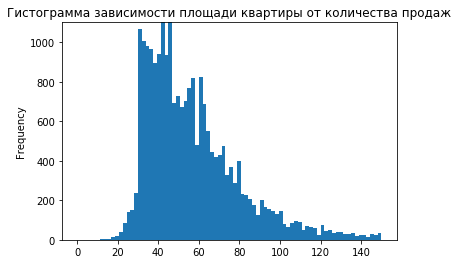

AxesSubplot(0.125,0.125;0.775x0.755)


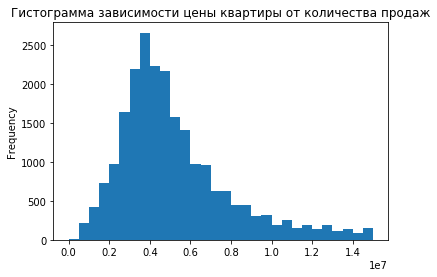

AxesSubplot(0.125,0.125;0.775x0.755)


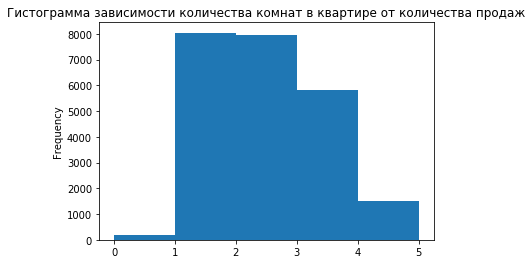

AxesSubplot(0.125,0.125;0.775x0.755)


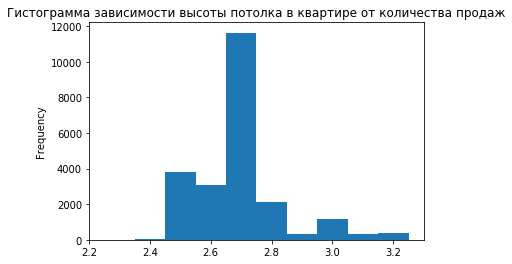

AxesSubplot(0.125,0.125;0.775x0.755)


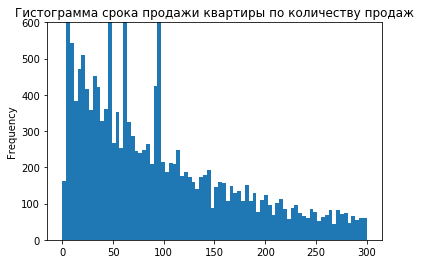

In [64]:
hist_plots(data,
    ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition'],
    [80, 30, 5, 10, 80],
    [(0, 150), (0, 15000000), (0, 5), (2.25, 3.25), (0, 300)],
    [(0, 1100), None, None, None, (0, 600)],
    [
        "Гистограмма зависимости площади квартиры от количества продаж",
        "Гистограмма зависимости цены квартиры от количества продаж",
        "Гистограмма зависимости количества комнат в квартире от количества продаж",
        "Гистограмма зависимости высоты потолка в квартире от количества продаж",
        "Гистограмма срока продажи квартиры по количеству продаж"
    ]
)

#### Вывод:
- Согласно графикам и коэффициенту корреляции зависимости стоимости недвижимости от цены за квадратный метр, мы видим, что существует связь между изменением цены за квадратный метр и стоимостью недвижимости, равным 0,63 ,
- По графикам и коэффициенту корреляции зависимости стоимости недвижимости от количества комнат можно сказать, что существует связь между изменением стоимости недвижимости и количеством комнат, но она слабая , равный 0,45.
- По графику и коэффициенту корреляции зависимости стоимости недвижимости от пола можно сказать, что существует связь между изменением стоимости недвижимости и полом, но она слабая, равная 0,13. Примечательно, что квартиры на первом этаже самые дешевые от 4 000 000 руб.
- Квартиры площадью от 35 до 60 кв. М лучше всего продаются.
- Больше всего квартир с ценой 2 500 000 руб. до 7 000 000 руб.
- Однокомнатные и двухкомнатные квартиры пользуются наибольшим спросом.
- Самая популярная высота потолков 2,5м - 2,8м
- Большинство квартир продаются довольно быстро. от 0 до 95-160 дней.

#### Какие факторы больше всего влияют на стоимость квартиры?

- Проверьте, зависит ли цена от квадратного метра, количества комнат, этажа (первый или последний), удаленности от центра. Также изучите зависимость от даты размещения: день недели, месяц и год.
- Выберите 10 мест с наибольшим количеством объявлений.
- Рассчитайте среднюю цену за квадратный метр в этих населенных пунктах.
- Выделите населенные пункты с самой высокой и самой низкой стоимостью жилья. Эти данные можно найти по имени в столбце «locality_name».

<font color = green> Зависимость цены квартир от параметров: 1) цены за квадратный метр, 2) количество комнат, этаж (первый или последний), 3) удаленность от центра, с 4) дата размещения 5) день недели, 6) месяц и 7) год.</font>

In [65]:
cor_meter = data['last_price'].corr(data['meter_price'])
print("Зависимость цены от цены за квадратный метр: {:.6f}".format(cor_meter))

cor_rooms = data['last_price'].corr(data['rooms'])
print("Зависимость цены от количества комнат: {:.6f}".format(cor_rooms))

data['floor_kind_category'] = data['floor'].astype('category').cat.codes
cor_floor = data['last_price'].corr(data['floor_kind_category'])
print("Зависимость цены от этажа: {:.6f}".format(cor_rooms))

cor_city = data['last_price'].corr(data[data['cityCenters_nearest'] != -999.99]['cityCenters_nearest'])
print("Зависимость цены от расстояния до центра: {:.6f}".format(cor_city))

cor_days = data['last_price'].corr(data['day_week'])
print ("Зависимость цены от дня публикации: {:.6f}".format(cor_days))
cor_month = data['last_price'].corr(data['month'])
print ("Ценовая зависимость от месяца публикации: {:.6f}".format(cor_month))
cor_year = data['last_price'].corr(data['year']) 
print ("Зависимость цены от года публикации: {:.6f}".format(cor_year))

Зависимость цены от цены за квадратный метр: 0.736499
Зависимость цены от количества комнат: 0.363343
Зависимость цены от этажа: 0.363343
Зависимость цены от расстояния до центра: -0.206909
Зависимость цены от дня публикации: 0.001550
Ценовая зависимость от месяца публикации: 0.002779
Зависимость цены от года публикации: -0.043089


- Цена квартиры зависит от цены за квадратный метр. Зависимость от количества комнат также прослеживается.
- Цена не зависит от других параметров, представленных выше - коэффициент корреляции меньше 0,1 и стремится к нулю.

<font color = green> Мы анализируем 10 населенных пунктов с наибольшим количеством объявлений.</font>

In [66]:
top_city = data.groupby('locality_name')['last_price'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
top_city

,locality_name,count
34,Санкт-Петербург,15721
292,посёлок Мурино,522
327,посёлок Шушары,440
4,Всеволожск,398
33,Пушкин,369
14,Колпино,338
297,посёлок Парголово,327
7,Гатчина,307
94,деревня Кудрово,299
5,Выборг,237


<font color = green> Мы рассчитываем среднюю цену за квадратный метр в этих населенных пунктах.</font>

In [67]:
def mean_price(row):
    return data[data['locality_name'] == row]['meter_price'].median()

top_city['mean_price'] = top_city['locality_name'].apply(mean_price)
top_city

,locality_name,count,mean_price
34,Санкт-Петербург,15721,104761.0
292,посёлок Мурино,522,85878.0
327,посёлок Шушары,440,76876.0
4,Всеволожск,398,65789.0
33,Пушкин,369,100000.0
14,Колпино,338,74723.5
297,посёлок Парголово,327,91642.0
7,Гатчина,307,67796.0
94,деревня Кудрово,299,91860.0
5,Выборг,237,58158.0


<font color = green> Он найдет населенные пункты с самой высокой и самой низкой стоимостью жилья.</font>

In [68]:
print(f"Самая высокая стоимость жилья в \"{top_city.sort_values(by='mean_price', ascending=False).head(1)['locality_name'].to_string(index=False)}\"")
print(f"Самая низкая стоимость жилья в \"{top_city.sort_values(by='mean_price').head(1)['locality_name'].to_string(index=False)}\"")

Самая высокая стоимость жилья в " Санкт-Петербург"
Самая низкая стоимость жилья в " Выборг"


#### Изучите предложения квартир в Санкт-Петербурге.

- Для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача выяснить, какая область находится в центре. Создайте столбец с расстоянием до центра в километрах: от округления до целых значений.
- После этого рассчитайте среднюю цену за каждый километр.
- Постройте график: он должен показать, как цена зависит от расстояния от центра.
- Определите границу, где график сильно меняется - это будет центральная зона.

<font color = green> Мы фильтруем данные по местоположению "Санкт-Петербург":</font>

In [69]:
spb_city = pd.DataFrame(data.loc[data['locality_name'] == 'Санкт-Петербург'])
spb_city.reset_index()
print (f"Количество квартир на продажу в Санкт-Петербурге:\"{len(spb_city)}\"")

Количество квартир на продажу в Санкт-Петербурге:"15721"


<font color = green> Создайте столбец с расстоянием до центра в километрах с округлением до целых значений.</font>

In [70]:
km = 1_000
spb_city['cityCenters_nearest_km'] = (spb_city['cityCenters_nearest'] / km)
spb_city[:5][['cityCenters_nearest_km', 'cityCenters_nearest']]

,cityCenters_nearest_km,cityCenters_nearest
0,16.028,16028.0
2,13.933,13933.0
3,6.800,6800.0
4,8.098,8098.0
7,11.634,11634.0


<font color = green> Мы построим график, который показывает, как цена зависит от расстояния от центра:</font>

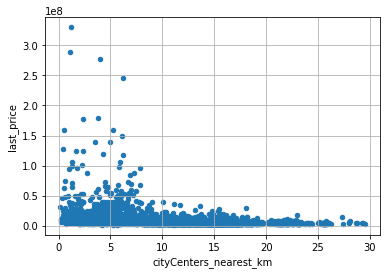

In [71]:
(
    pd.DataFrame(spb_city.pivot_table(index='cityCenters_nearest_km', values='last_price').to_records())
    .plot(x='cityCenters_nearest_km', y='last_price', kind='scatter', grid=True)
)
plt.show()

Мы определяем границу, где график сильно меняется - это будет центральная зона. График резко меняется при x = 7500. Это означает, что в центр входят все квартиры, в которых расстояние до центра составляет менее 7500.

#### Выберите сегмент квартир в центре.

- Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, количество комнат, высота потолка.
- Также выделим факторы, которые влияют на стоимость квартиры (количество комнат, этаж, расстояние от центра, дата размещения рекламы).
- Сделать выводы. Отличаются ли они от общих находок по всему городу?

<font color = green> Узнайте, какой регион находится в центре Санкт-Петербурга.</font>

In [72]:
flat_spb_centr = pd.DataFrame(spb_city.query('cityCenters_nearest_km <= 7'))
print (f"Количество квартир на продажу в центре Санкт-Петербурга:\"{len(flat_spb_centr)}\"")

Количество квартир на продажу в центре Санкт-Петербурга:"3305"


In [73]:

flat_spb_centr = spb_city[spb_city['cityCenters_nearest'] < 7500]
flat_spb_centr.reset_index(drop=True, inplace=True)

def get_median(data, columns, names):
    for i in range(0, len(columns)):
        print (f"Медиана {names[i]}: {data[columns[i]].median()}")
    return 

print ("\nЦентр Санкт-Петербурга:")
get_median(
    flat_spb_centr,
    [
        'last_price',
        'ceiling_height',
        'living_area',
        'kitchen_area',
        'rooms',
    ],
    [
        "apartment prices",
        "ceiling heights",
        "living space",
        "kitchen area",
        "number of rooms"
    ]
)

print ("\nВесь город Санкт-Петербург: ")
get_median(
    spb_city,
    [
        "last_price",
        "ceiling_height",
        "living_area",
        "kitchen_area",
        "rooms"
    ],
    [
        "apartment prices",
        "ceiling heights",
        "living space",
        "kitchen area",
        "number of rooms"
    ]
)


Центр Санкт-Петербурга:
Медиана apartment prices: 9200000.0
Медиана ceiling heights: 2.8
Медиана living space: 43.0
Медиана kitchen area: 11.2
Медиана number of rooms: 3.0

Весь город Санкт-Петербург: 
Медиана apartment prices: 5500000.0
Медиана ceiling heights: 2.65
Медиана living space: 30.1
Медиана kitchen area: 9.1
Медиана number of rooms: 2.0


<font color = green> Мы выделяем факторы, влияющие на стоимость квартиры.</font>
<font color = green> Ранее мы уже делали разрез для квартир в центре Санкт-Петербурга с учетом нормального диапазона цен. Мы добавляем остальные критерии, которые влияют на чистоту данных, и делаем окончательный анализ на их основе.</font>

In [74]:
parameter = [
    "Ценовая зависимость за квадратный метр",
    "Зависимость цены от пола",
    "Ценовая зависимость от количества номеров",
    "Зависимость цены от расстояния от центаv",
    "Зависимость цены от высоты потолка",
    "Зависимость цены от дня публикации",
    "Зависимость цены от месяца публикации",
    "Зависимость цены от года публикации",
    "Средние цены на квартиры",
    "Средняя высота потолка",
    "Медиана жилой площади",
    "Медиана кухонной зоны",
    "Медиана количества комнат"
]

city_total_spb = { 
    'spb_city': [0.76, -0.03, 0.37, -0.25, 0.06, 0.00, 0.00, -0.04, 5500000.0, 2.65, 31.2, 9.7, 2.0],
    'flat_spb_centr': [0.79, -0.06, 0.31, -0.04, 0.07, 0.02, -0.01, -0.04, 9200000.0, 2.8, 46.0, 11.9, 3.0]
}

compare_data = pd.DataFrame(city_total_spb, index=parameter)
compare_data['difference'] = (compare_data['spb_city'] - compare_data['flat_spb_centr']).round(2)
compare_data

,spb_city,flat_spb_centr,difference
Ценовая зависимость за квадратный метр,0.76,0.79,-0.03
Зависимость цены от пола,-0.03,-0.06,0.03
Ценовая зависимость от количества номеров,0.37,0.31,0.06
Зависимость цены от расстояния от центаv,-0.25,-0.04,-0.21
Зависимость цены от высоты потолка,0.06,0.07,-0.01
Зависимость цены от дня публикации,0.00,0.02,-0.02
Зависимость цены от месяца публикации,0.00,-0.01,0.01
Зависимость цены от года публикации,-0.04,-0.04,0.00
Средние цены на квартиры,5500000.00,9200000.00,-3700000.00
Средняя высота потолка,2.65,2.80,-0.15


#### Вывод:
- Количество квартир на продажу в центре Санкт-Петербурга: 3305
- Средняя цена квартиры в Санкт-Петербурге: 5 500 000 руб.
- Средние цены на квартиры в центре Санкт-Петербурга: 9 200 000 руб.
- Средняя площадь квартиры в Санкт-Петербурге: 31,20 кв.м
- Средняя площадь квартиры в центре Санкт-Петербурга: 46,00 кв.м
- На стоимость квартиры в Санкт-Петербурге сильно влияют: 1) цена квадратного метра, 2) расположение квартиры, 3) количество комнат
- В центре Санкт-Петербурга квартиры дорогие, несмотря на среднюю площадь квартир в центре 46,00 кв.м. Интересное наблюдение, квартиры в таких домах обычно имеют высокие потолки, большую гостиную, большую кухню и как минимум 3 комнаты. Также, согласно последним графикам, квартиры в центре продаются довольно быстро.

### Шаг 5. Общий вывод

Итак, я изучил образец, предоставленный сервисом Яндекс.Недвижимость:
- Изучил данные о продажах квартир;
- классифицированные и восстановленные данные;
- Найдены закономерности в данных и заполнены все пробелы;
- Построены графики зависимости цены квартиры от ее параметров;
- В выборке был найден город с наибольшим количеством объявлений о продаже квартир;
- Выделен сегмент рекламы, которая продается в центре Санкт-Петербурга;
- Определена зависимость цены квартиры от ее параметров для центра города.
- Определены параметры, которые напрямую влияют на стоимость квартиры:

Расположение квартиры (город / пригород, центр / не центр);
- Количество комнат
- Жилая площадь квартиры;
- количество комнат;
- Незначительные данные, такие как «высота потолка, дата публикации», мало влияют на ценообразование.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод